In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re


In [3]:
exhibitors_df=pd.read_csv('/content/exhibitors_themes.csv').drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")
visitors_df=pd.read_csv('/content/visitors_themes.csv').drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")

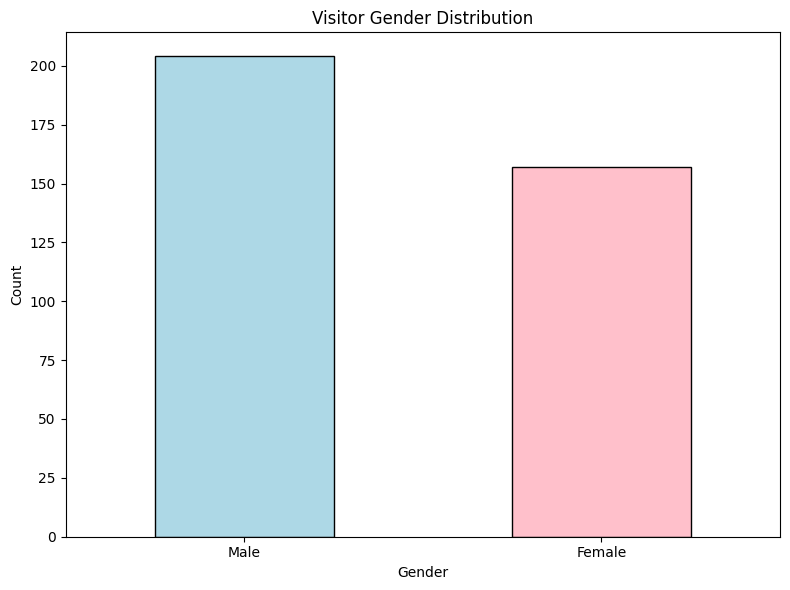

In [8]:
visitor_gender_df = visitors_df['gender'].value_counts()

plt.figure(figsize=(8, 6))
visitor_gender_df.plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title('Visitor Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.tight_layout()
plt.show()


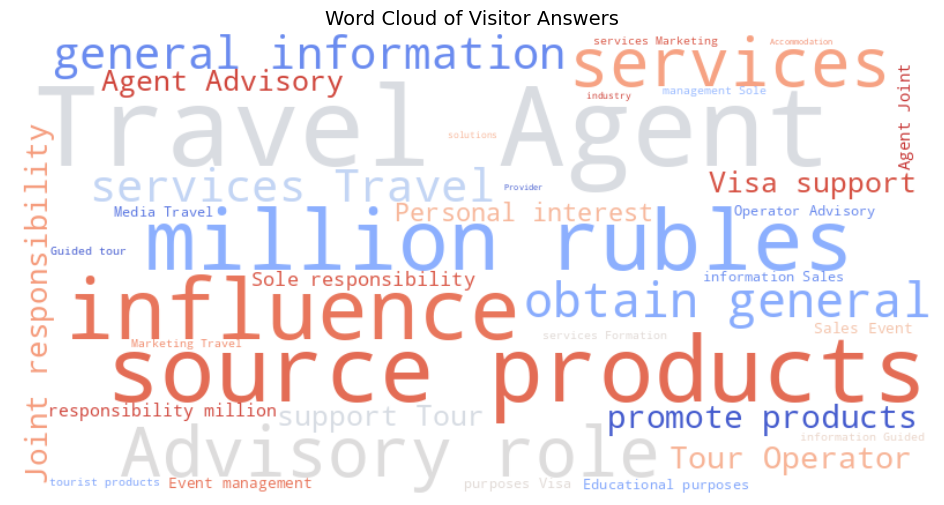

In [12]:
text_data = " ".join(visitors_df["answer"].astype(str))
text_data = re.sub(r'[^A-Za-z\s]', '', text_data)

stopwords = set(STOPWORDS)
stopwords.update(["the", "of", "and", "to", "in", "for", "on", "with", "at"])  # Add more if needed


wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="coolwarm").generate(text_data)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Visitor Answers", fontsize=14)
plt.show()


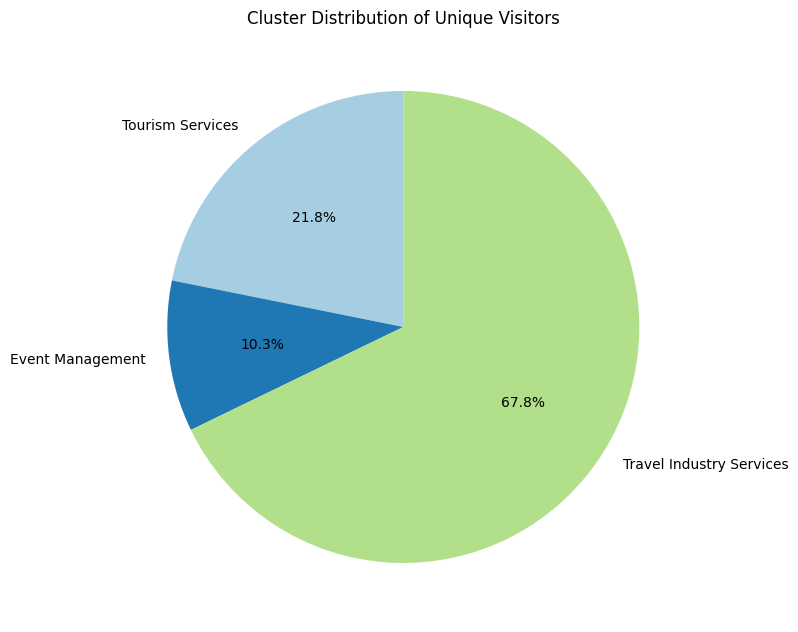

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_distribution = visitors_df.groupby('Cluster')['visitorId'].nunique()

cluster_themes = visitors_df.drop_duplicates(subset='Cluster')[['Cluster', 'Cluster_Theme']]

cluster_theme_mapping = dict(zip(cluster_themes['Cluster'], cluster_themes['Cluster_Theme']))

cluster_distribution.index = cluster_distribution.index.map(cluster_theme_mapping)

plt.figure(figsize=(8, 8))
cluster_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=cluster_distribution.index, colors=plt.cm.Paired.colors)
plt.title('Cluster Distribution of Unique Visitors')
plt.ylabel('')
plt.tight_layout()
plt.show()


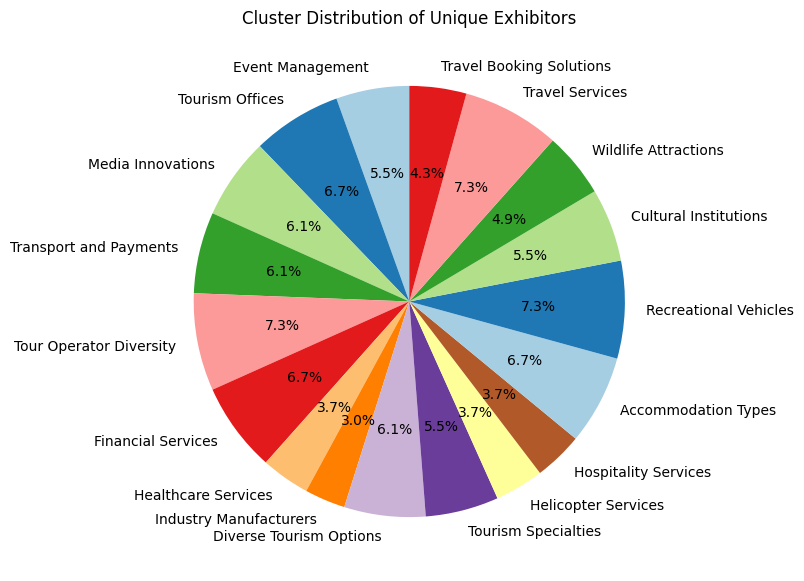

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_distribution = exhibitors_df.groupby('Cluster')['exhibitorid'].nunique()

cluster_themes = exhibitors_df.drop_duplicates(subset='Cluster')[['Cluster', 'Cluster_Theme']]

cluster_theme_mapping = dict(zip(cluster_themes['Cluster'], cluster_themes['Cluster_Theme']))

cluster_distribution.index = cluster_distribution.index.map(cluster_theme_mapping)

plt.figure(figsize=(8, 8))
cluster_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=cluster_distribution.index, colors=plt.cm.Paired.colors)
plt.title('Cluster Distribution of Unique Exhibitors')
plt.ylabel('')
plt.tight_layout()
plt.show()


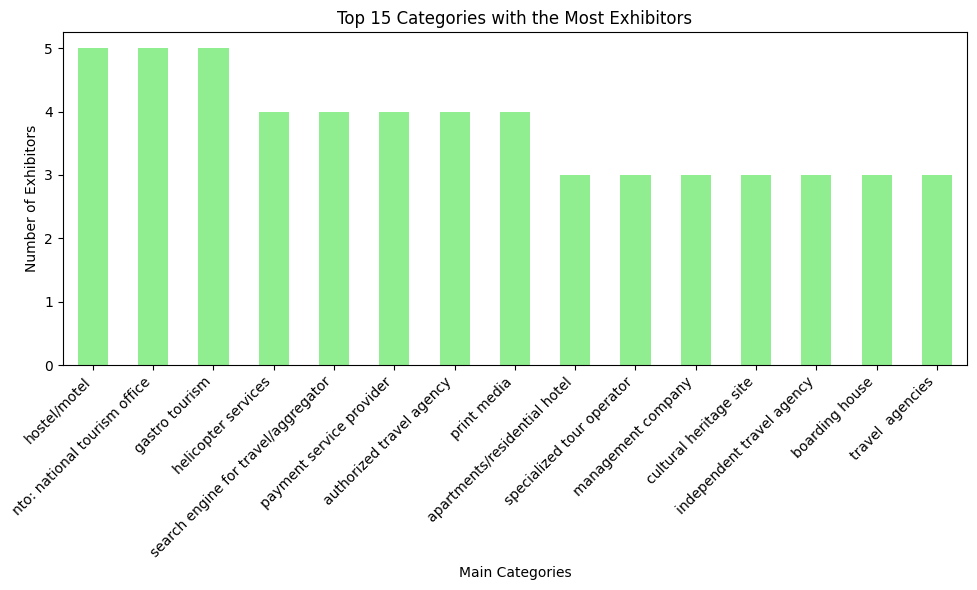

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

category_count = exhibitors_df['MainCategories'].value_counts()

top_10_categories = category_count.head(15)

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 15 Categories with the Most Exhibitors')
plt.xlabel('Main Categories')
plt.ylabel('Number of Exhibitors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [24]:
category_count

,count
MainCategories,
hostel/motel,5
nto: national tourism office,5
gastro tourism,5
helicopter services,4
search engine for travel/aggregator,4
...,...
global healthcare providers,1
"real estate, property and homes abroad",1
event organizer,1
